# Notebook Description

This project aims to analyze and explore the data found in the vgsales.csv dataset downloaded from https://www.kaggle.com/gregorut/videogamesales. In a different Jupyter notebook, I analyzed historical trends in the video game sales data contained in this dataset; I also looked at various microslices of the data. In this notebook, and in the spirit of "you can only work with the data you have," I explore whether it is possible to predict a video game's genre using only its sales figures and its year of its release. Such an endeavour probably won't result in terribly accurate predictions, but maybe my machine learning models can do better than random. 

# Import Needed Packages

In [1]:
# Import analysis packages:
import pandas as pd
import numpy as np

In [2]:
# Import plotting package:
from matplotlib import pyplot as plt

In [3]:
# Import data scaling class from Scikit-Learn:
from sklearn.preprocessing import StandardScaler

# Import training/test set splitting class from Scikit-Learn:
from sklearn.model_selection import train_test_split

# Import classification classes from Scikit-Learn:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Read in the Data, Investigate It, Clean It, and Sort It

In [4]:
# Read video game sales file from Kaggle to a Pandas DataFrame:
vg_sales_data = pd.read_csv('vgsales.csv')

In [5]:
# Print out the header of the resulting DataFrame:
print(vg_sales_data.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [ ]:
# The file description from Kaggle indicates that sales figures are in "millions."
# I will assume that "millions" means millions of U.S. dollars.

# Predicting Game Genre Given Sales Figures and Year of Release

In [6]:
# Before attempting to build machine learning models that will predict a game's genre given its sales figures
# and year of release, eliminate games for which some or all of the sales data is unavailable; also eliminate
# games for which genre and/or year of release is not available:
vg_sales_data_cleaned = vg_sales_data.dropna(subset=['Genre','Year', 'Global_Sales', 'NA_Sales', 'EU_Sales', \
                                                     'JP_Sales', 'Other_Sales'])

# From the above DataFrame, keep only information about year of release and global, North American, European,
# Japanese, and "Other" sales figures:
raw_vg_sales_data = vg_sales_data_cleaned[['Year','Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
# The "label," i.e. the thing to be predicted, is the game's genre; store this in a separate Series.
raw_vg_sales_labels = vg_sales_data_cleaned['Genre']

In [7]:
# Split the data in the raw_vg_sales_data DataFrame (as well as their corresponding labels) into training and 
# test sets. The test set will be set aside to see how well the machine learning model performs after having
# been trained on the training set. I am choosing to set aside 15% of the data in the DataFrame
# raw_vg_sales_data as the test set, which leaves the remaining 85% of data for the training set.
# An arbitrary integer has been chosen as the random state to ensure the same splitting between training
# and test set each time the kernel is run.

data_train, data_test, labels_train, labels_test = train_test_split(raw_vg_sales_data, raw_vg_sales_labels, \
                                                   train_size = 0.85, test_size = 0.15, random_state = 19)

In [8]:
# Since the data are on a variety of different scales, standardize them by removing the average and scaling to
# a variance of one. This is done by using the scikit-learn preprocessing class StandardScaler. Further 
# information about StandardScaler can be found at:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# instantiate a class object:
stdscale = StandardScaler()
# fit the object to the training data, then standardize it:
scaled_data_train = stdscale.fit_transform(data_train)
# standardize the test data based on the statistics of the training data:
scaled_data_test = stdscale.transform(data_test)

In [9]:
# Use a k-Nearest Neighbours algorithm to predict game genre given year of release and sales data. The scaled
# training data will be passed to the algorithm to train it. Since the optimum value of k (i.e. the number of 
# nearest neighbours) is not known a priori, choose it based on which value results in the highest accuracy 
# model. The scaled test data will be used to determine the accuracy of a model.

# create an empty array to hold accuracy scores:
scores_knn = []

# loop over values of k; create a k-nearest neighbours model for each k, train it, and calculate its accuracy sore:
for k in range(1,301):
    # instantiate a class object with the desired value of k
    classifier = KNeighborsClassifier(n_neighbors = k)
    # fit the object to the scaled training data:
    classifier.fit(scaled_data_train, labels_train)
    # calculate the accuracy score based on the scaled test data:
    scores_knn.append(classifier.score(scaled_data_test, labels_test))

# print out the optimum value of k and what the resultant accuracy score was:
print(scores_knn.index(max(scores_knn))+1, max(scores_knn))

50 0.2710204081632653


Text(0.5, 1.0, 'Trend of Model Accuracy with Increasing k')

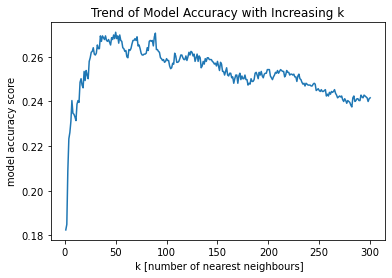

In [10]:
# plot accuracy score v. k (vertical axis v. horizontal axis nomenclature) to see if accuracy rises and then 
# falls with increasing k as expected:
plt.plot(range(1,301),scores_knn)
plt.xlabel(' k [number of nearest neighbours]')
plt.ylabel('model accuracy score')
plt.title('Trend of Model Accuracy with Increasing k')

In [ ]:
# As expected, accuracy rises with k until some maximum value, then falls with increasing k as the 
# model becomes underfit.

In [11]:
# Test to see how the "best" k-Nearest Neighbours model compares to random.
# If one were to assign a genre to a game at random, what would be the chance of getting it right?

print(1.0/len(vg_sales_data.Genre.unique()))


0.08333333333333333


In [ ]:
# Thus, the "best" k-Nearest Neighbours model for classifying the genres of video games in this data set
# based on year of release and sales data outperforms random, but can hardly be said to be a great
# predictive algorithm. While getting the genre right 27% of the time is better than getting it right 8%
# of the time, you still misclassify a game 73% of the time. That's not great performance.

# Perhaps a different classification algorithm will perform better.

In [12]:
# Use a Support Vector Machine classification algorithm to predict game genre given year of release and sales data. 
# This machine learning algorithm assumes data which are centered on zero, so it must be passed the scaled training 
# data. Since neither the optimal C (regularization parameter) nor the optimal gamma is known, treat these as free
# parameters and choose the combination which results in the highest accuracy when the trained model is applied to 
# the scaled test data.

# create empty arrays to store model accuracy scores, C values, and gamma values:
scores = []
gees = []
cees = []

# loop over possible gamma values:
for g in range(1,20):
    # loop over possible C values:
    for c in range(1,20):
        # divide C by 10, to allow for more misclassifications when setting the decision boundary:
        c = c / 10.0
        # instantiate a class object:
        classes = SVC(kernel = 'rbf', gamma = g, C = c)
        # fit the object to the scaled training data:
        classes.fit(scaled_data_train, labels_train)
        # store the resulting accuracy score, gamma, and C to the appropriate array:
        scores.append(classes.score(scaled_data_test,labels_test))
        gees.append(g)
        cees.append(c)
        
# I found the following to be very helpful to develop better intuition for the role of small vs. large
# regularization parameters in SVM algorithms:
# https://datascience.stackexchange.com/questions/4943/intuition-for-the-regularization-parameter-in-svm

In [13]:
# print the highest accuracy score obtained by the above loop, and print the index of the scores list 
# where it was stored:
print(scores.index(max(scores)), max(scores))
print(gees[253])
print(cees[253])

253 0.26285714285714284
14
0.7


In [14]:
# Use a single tree decision classification algorithm to predict game genre given year of release and sales data. 

# instantiate a class object, and give it a random state so that the same tree is generated each time the kernel
# is run. The integer value fed to random_state is arbitrary.
single_tree_all = DecisionTreeClassifier(random_state = 37)
# fit the object to the training data:
single_tree_all.fit(data_train, labels_train)
# use the trained model to predict the classes (i.e. game genres) of data in the test set:
single_tree_all_predictions = single_tree_all.predict(data_test)

In [15]:
# Use a random forest classification algorithm to predict game genre given year of release and sales data. 

# instantiate a class object, and give it a random state so that the same tree is generated each time the kernel
# is run. The integer value fed to random_state was chosen to be the same value fed to the single tree
# decision classifier. Also, a fairly large number of estimators was chosen in an attempt to avoid overfitting.
forest_all = RandomForestClassifier(n_estimators = 500, random_state = 37)
# fit the object to the training data:
forest_all.fit(data_train, labels_train)
# use the trained model to predict the classes (i.e. game genres) of data in the test set:
forest_all_predictions=forest_all.predict(data_test)

In [16]:
# print the accuracy score of the single tree decision classifier:
print('Single Tree Accuracy: ', single_tree_all.score(data_test,labels_test))
# print the accuracy score of the random forest classifier:
print('Random Forest Accuracy: ', forest_all.score(data_test,labels_test))

Single Tree Accuracy:  0.21183673469387754
Random Forest Accuracy:  0.23673469387755103
